In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-06 15:36:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  32.0MB/s    in 1.1s    

2024-08-06 15:36:32 (32.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [ ]:
import sqlite3
conn=sqlite3.connect("m4_survey_data.sqlite")

In [ ]:
import pandas as pd

In [ ]:
# run sql query
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [ ]:
#list all tables
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [ ]:
# run a group of query
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [ ]:
# describe a table
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

array([[<Axes: title={'center': 'ConvertedComp'}>]], dtype=object)

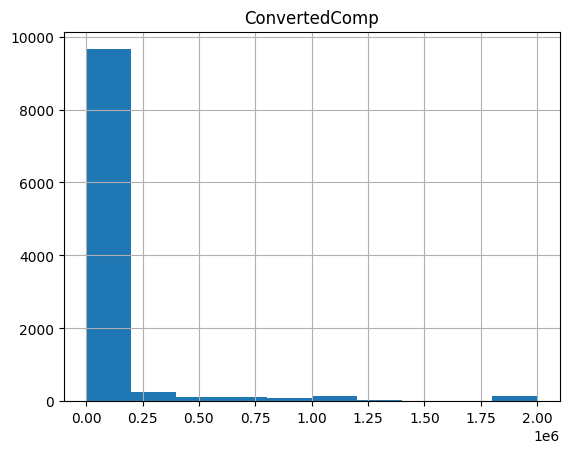

In [ ]:
# Histograms
QUERY="""SELECT * FROM master"""

df=pd.read_sql_query(QUERY,conn)
df.hist(column='ConvertedComp')

<Axes: >

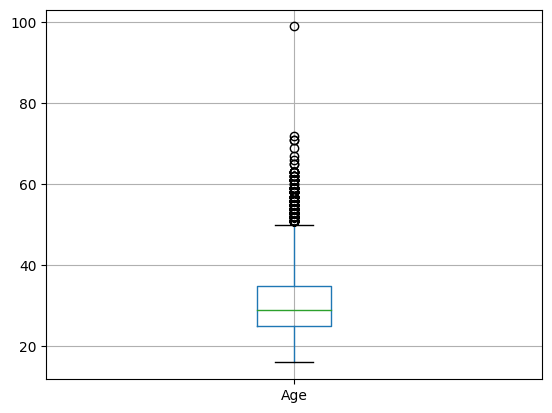

In [ ]:
# Box Plots
QUERY="""SELECT * FROM master"""
df=pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age')

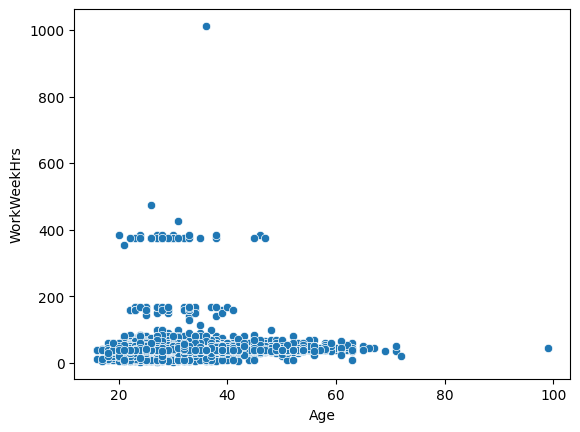

In [ ]:
# Scatter Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

QUERY="""SELECT * FROM master"""
df=sns.scatterplot(x='Age',y='WorkWeekHrs',data=df)

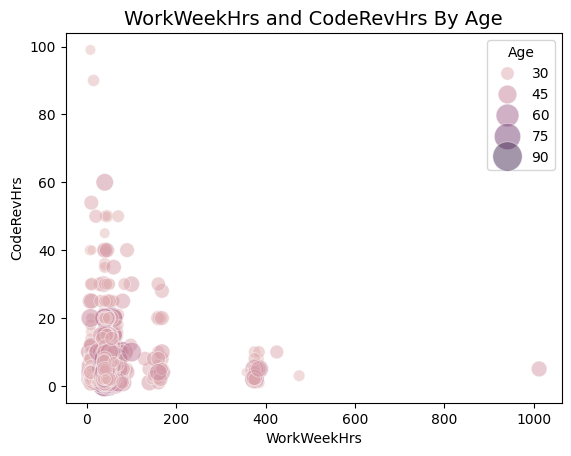

In [ ]:
# Bubble Plots
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df1=pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=df1, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500))

plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14)
plt.xlabel('WorkWeekHrs', size=10)
plt.ylabel('CodeRevHrs', size=10)

plt.show()

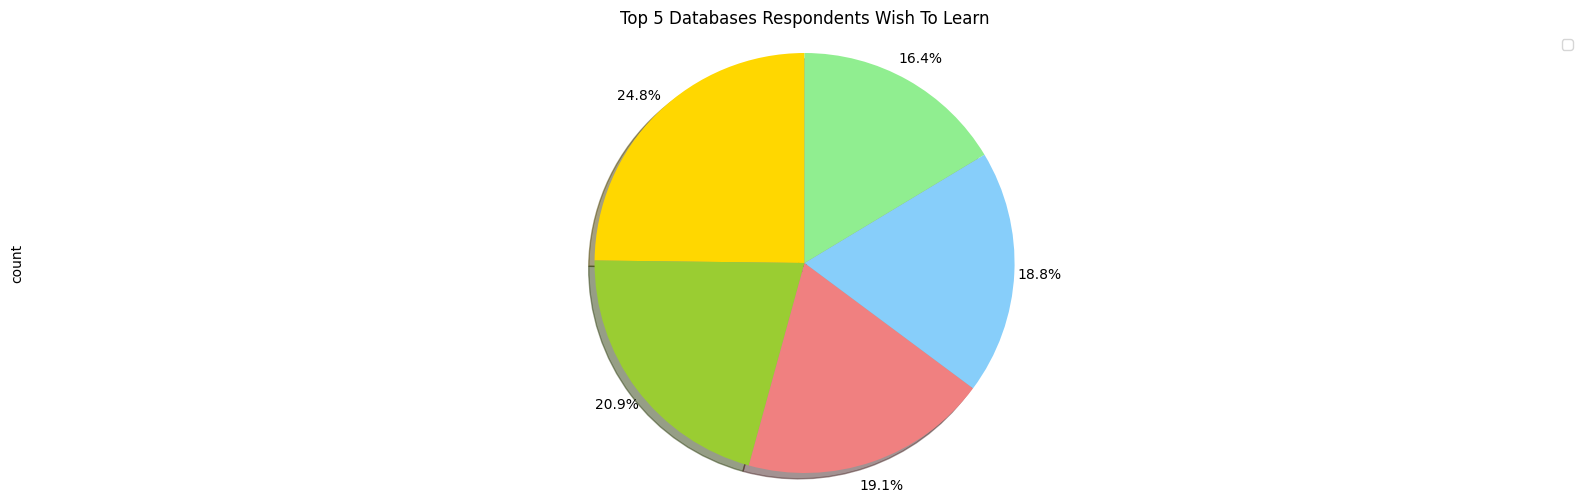

In [ ]:
# Pie Charts
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""

df=pd.read_sql_query(QUERY,conn)
df.set_index('DatabaseDesireNextYear', inplace=True)

colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list, shadow=True, pctdistance=1.12)

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 Databases Respondents Wish To Learn')
plt.legend()
plt.axis('equal')
plt.show()

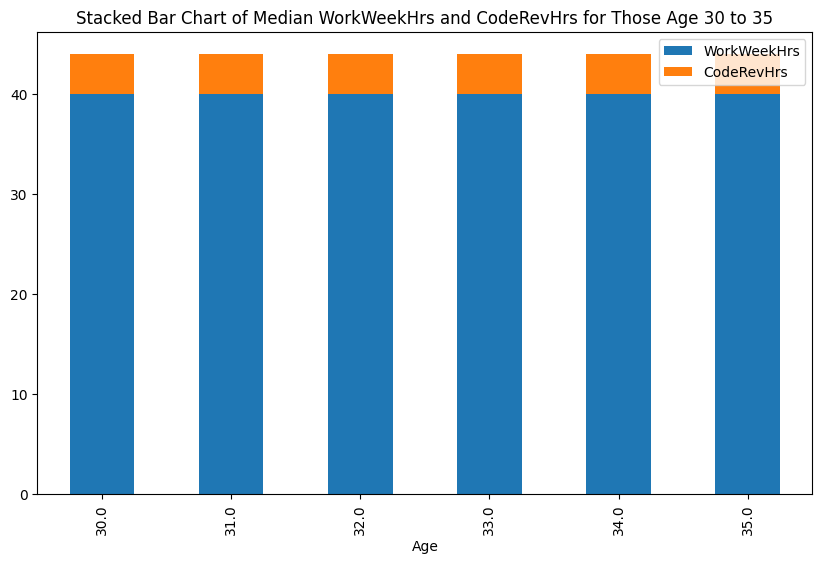

In [ ]:
# Stacked Charts
QUERY="""SELECT WorkWeekHrs,CodeRevHrs,Age FROM master
WHERE Age BETWEEN 30 AND 35"""

df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()

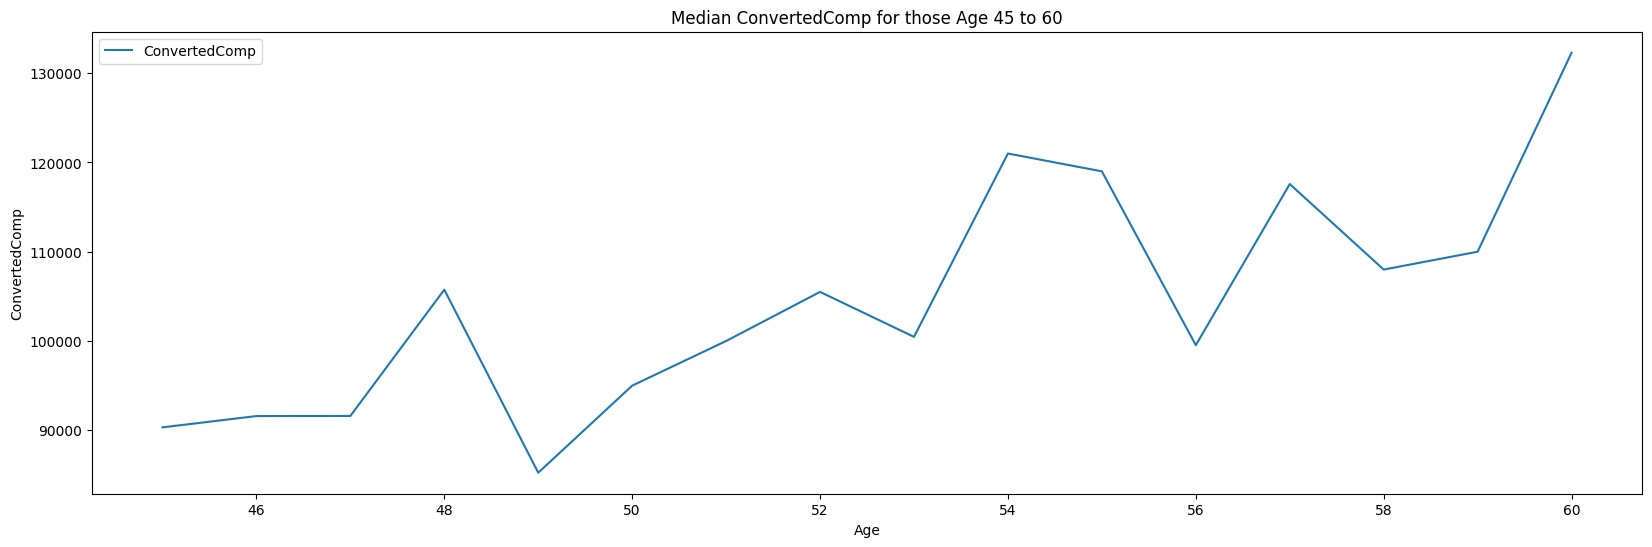

In [ ]:
# Line Chart
query="""
select ConvertedComp, Age from master
where Age between 45 and 60"""
df=pd.read_sql_query(query,conn)
df1=df.groupby('Age').median()

df1.plot(kind='line',figsize=(20,6))

plt.title('Median ConvertedComp for those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

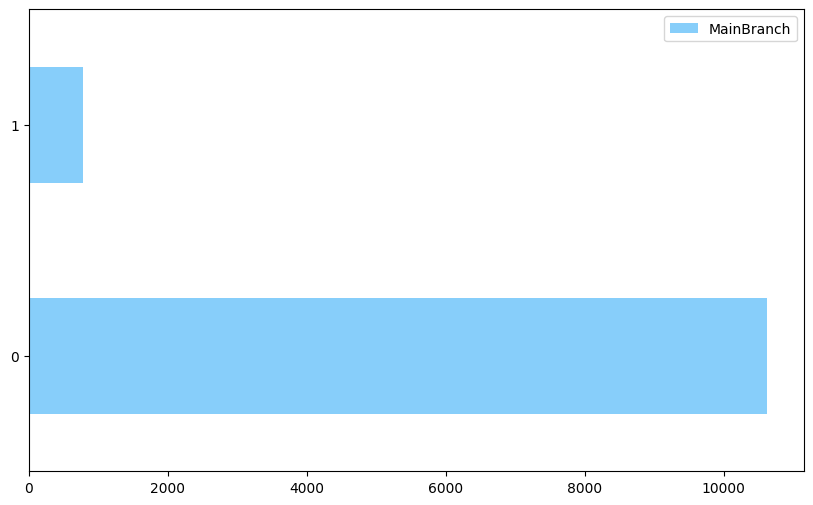

In [ ]:
# Bar Chart
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)

df.plot(kind='barh', figsize=(10,6), color='lightskyblue')

plt.show()

In [ ]:
conn.close()

In [ ]:
# Pivot Table
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-06 15:58:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  13.0MB/s    in 2.7s    

2024-08-06 15:58:23 (13.0 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



In [ ]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [ ]:
df.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

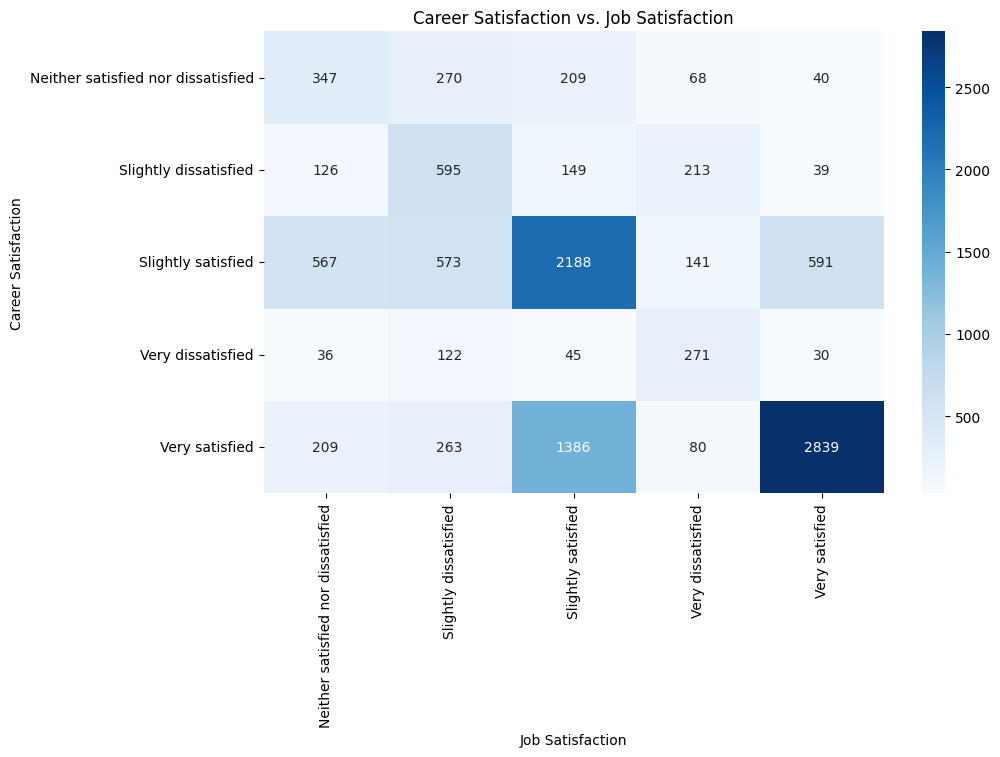

In [ ]:
# Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction

pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

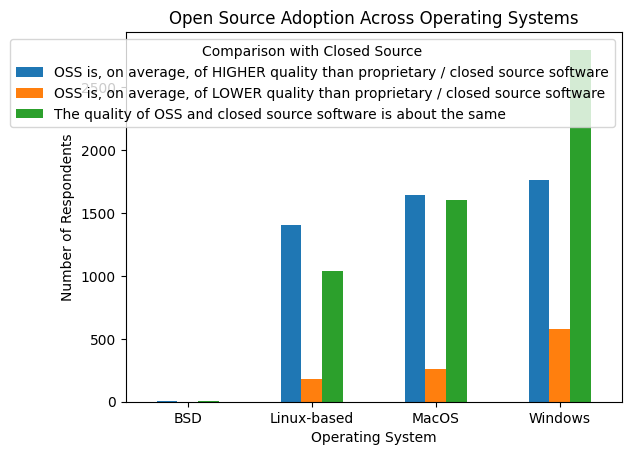

In [ ]:
# Scenario 2: Comparison of Open Source Adoption Across Operating Systems
pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()

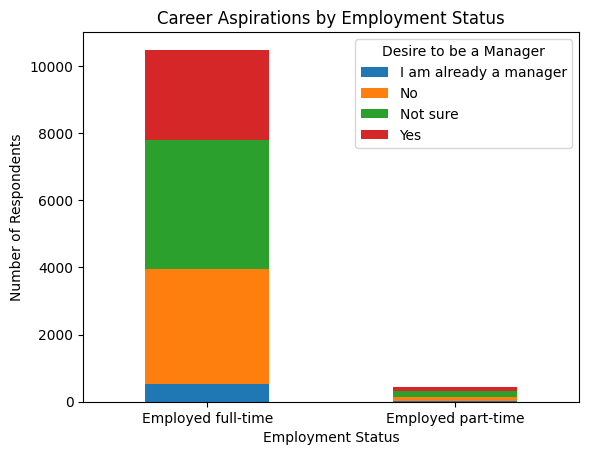

In [ ]:
# Scenario 3: Job Satisfaction and Career Aspirations by Employment Status
pivot_table = pd.pivot_table(df, index='Employment', columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.to_excel('./data.xlsx',index=False)